In [1]:
%pylab inline
from matplotlib import cm

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = np.loadtxt('../HW2.txt')

X = data[:,1]
Y = data[:,2]
sigma_X = data[:,4]
sigma_Y = data[:,3]
rho_xy = data[:,5]


In [3]:
def scatter_plot(x, y, sigmax=False, sigmay=False):
    figsize(6,5)
    errorbar(x, y, xerr=sigmax, yerr=sigmay, c='k', fmt='o')
    xlabel('$x$')
    ylabel('$y$')

# 1

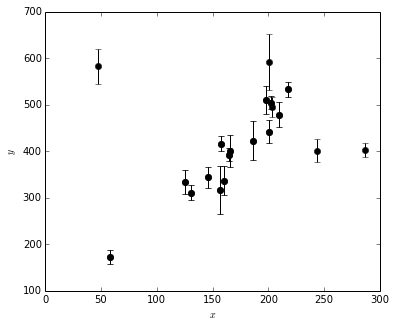

In [22]:
scatter_plot(X, Y, sigmay=sigma_Y)
scatter_plot(X[5:], Y[5:], sigmay=sigma_Y[5:])

In [5]:
def linear_fit1(x, y, sigmay):
    A = np.ones((len(y), 2))
    A[:,1] = x    
    C = np.zeros((len(y), len(y)))
    for i in range(len(y)):
        C[i][i] = sigmay[i]**2.0
    C_inv = linalg.inv(C)
    
    cov = dot(A.T,dot(C_inv,A))
    cov_inv = linalg.inv(cov)
    mat2 = dot(A.T,dot(C_inv,y))
    
    b,m = dot(cov_inv, mat2)
    
    print('b =', b)
    print('m =', m)
    print('sigma_b =',np.sqrt(cov_inv[0,0]))
    print('sigma_m =',np.sqrt(cov_inv[1,1]))

In [6]:
#1a.

linear_fit1(X[5:], Y[5:], sigma_Y[5:])

b = 34.8459413134
m = 2.23253621695
sigma_b = 18.4226404071
sigma_m = 0.110319915072


In [53]:
# 1b.

linear_fit1(X, Y, sigma_Y)

b = 213.273491976
m = 1.07674752417
sigma_b = 14.3940331072
sigma_m = 0.0774067831658


In [8]:
# 1c.

def linear_fit2(x, y, sigmay):
    A = np.ones((len(y), 3))
    A[:,1] = x    
    A[:,2] = x**2.0
    C = np.zeros((len(y), len(y)))
    for i in range(len(y)):
        C[i][i] = sigmay[i]**2.0
    C_inv = linalg.inv(C)
    
    cov = dot(A.T,dot(C_inv,A))
    cov_inv = linalg.inv(cov)
    mat2 = dot(A.T,dot(C_inv,y))
    
    q,b,m = dot(cov_inv, mat2)
    
    print('q =', q)
    print('b =', b)
    print('m =', m)
    print('sigma_q = ',np.sqrt(cov_inv[0,0]))
    print('sigma_b = ',np.sqrt(cov_inv[1,1]))
    print('sigma_m = ',np.sqrt(cov_inv[2,2]))


In [9]:
linear_fit2(X[5:], Y[5:], sigma_Y[5:])

q = 72.5764961168
b = 1.60453047644
m = 0.00225414507616
sigma_q =  38.9561346227
sigma_b =  0.581871215592
sigma_m =  0.00205066981428


# 2

In [32]:
def xi2(x, y, m, b, sigmay):
    xi_2 = np.sum((y-(m*x)-b)**2.0/(sigmay**2.0))
    return xi_2

#def ML(x, y, m , b, sigmay):
    


In [33]:
xi2(X[5:], Y[5:], 2.23253621695, 34.8459413134, sigma_Y[5:])

18.582309526605396

In [34]:
xi2(X, Y, 1.07674752417, 213.273491976, sigma_Y)

289.96372278199942

In [54]:
N_grid = 100
M = linspace(1, 3.2, N_grid)
B = linspace(-100, 100, N_grid)
xi2_min = np.zeros((N_grid,N_grid))
xi2_min2 = np.zeros((N_grid,N_grid))

for m in range(N_grid):
    for b in range(N_grid):
        xi2_min[b][m] = xi2(X[5:], Y[5:], M[m], B[b], sigma_Y[5:])
        xi2_min2[b][m] = xi2(X, Y, M[m], B[b], sigma_Y)

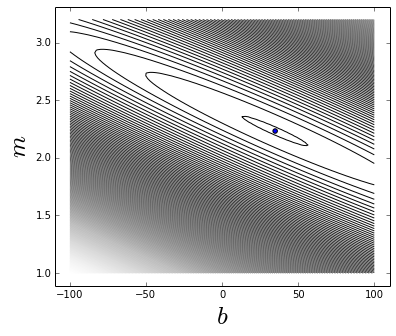

In [58]:
figsize(6,5)
contour(B, M, xi2_min.T, 260, cmap=cm.Greys_r)
scatter(34.8459413134,2.23253621695)
xlabel('$b$', fontsize=25)
ylabel('$m$', fontsize=25)

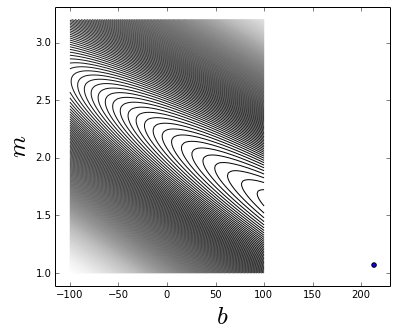

In [56]:
figsize(6,5)
contour(B, M, xi2_min2.T, 260, cmap=cm.Greys_r)
scatter(213.3,1.07)
xlabel('$b$', fontsize=25)
ylabel('$m$', fontsize=25)

# 3



In [152]:
def ML2(x, y, sigmay, m, b, V, P, Yb):
    exp1 = (1-P)/(np.sqrt(2.*np.pi*sigmay**2.0))*np.exp(-(y-(m*x)-b)**2.0/(2.0*sigmay**2.0))
    exp2 = P/(np.sqrt(2.0*np.pi*(sigmay**2.0+V)))*np.exp(-(y-Yb)**2.0/(2.0*(sigmay**2.0+V)))
    return np.prod(exp1+exp2)


In [153]:
ML2(X[4:], Y[4:], sigma_Y[4:], 2., 33., 2200, 0.5, 140.)

3.108359051594639e-52

In [113]:
N_grid = 40
M = linspace(1, 3.2, N_grid)
B = linspace(-100, 100, N_grid)

Pb = np.linspace(0, 1, 11.)
Vb = np.linspace(0, 4000, 11.)
Yb = np.linspace(0, 700, 11.)

ML = np.zeros((N_grid, N_grid))

for m in range(len(M)):
    for b in range(len(B)):
        ml_med = []
        for pb in range(len(Pb)):
            for vb in range(len(Vb)):
                for yb in range(len(Yb)):
                    ml_med.append(ML2(X[4:], Y[4:], sigma_Y[4:], M[m], B[b], Vb[vb], Pb[pb], Yb[yb]))
        ML[m][b] = np.sum(ml_med)

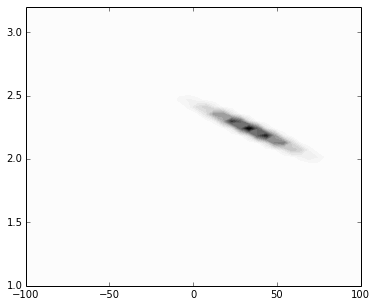

In [132]:
contourf(B, M, ML, 20, cmap=cm.Greys)

In [133]:
np.where(ML.T==np.max(ML.T))

(array([26]), array([22]))

In [134]:
print(B[26])
print(M[22])

33.3333333333
2.24102564103
